In [3]:
import pandas as pd
dataset=pd.read_csv("D:\\ML choaching program\\Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
x=dataset.iloc[:,3:5].values

In [12]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
kmeans.inertia_

106348.37306211118

In [15]:
kmeans.cluster_centers_

array([[87.        , 18.63157895],
       [44.15447154, 49.82926829],
       [86.53846154, 82.12820513]])

In [19]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [20]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

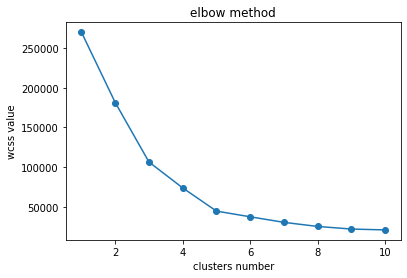

In [24]:
import matplotlib.pyplot as plt
plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("clusters number")
plt.ylabel("wcss value")
plt.show()

In [25]:
#optimum no of cluster is 5
model=KMeans(n_clusters=5,random_state=0)
model.fit(x)
y_pred=model.predict(x)


In [26]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

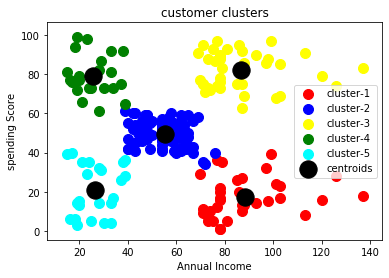

In [33]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c="red",label="cluster-1")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c="blue",label="cluster-2")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c="yellow",label="cluster-3")
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c="green",label="cluster-4")
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100,c="cyan",label="cluster-5")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c="black",label="centroids")
plt.legend()
plt.title("customer clusters")
plt.xlabel("Annual Income")
plt.ylabel("spending Score")
plt.show()